In [6]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
nltk.download('punkt_tab')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\brand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# 1. (12 pts) Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.htmlLinks to an external site. 

* Stem or lemmatize the words and find counts.

* Select the top 20 words and create a bar chart.

* Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list of top words, alter your logic to exclude them.

* Specify why you chose stemming or lemmatization.

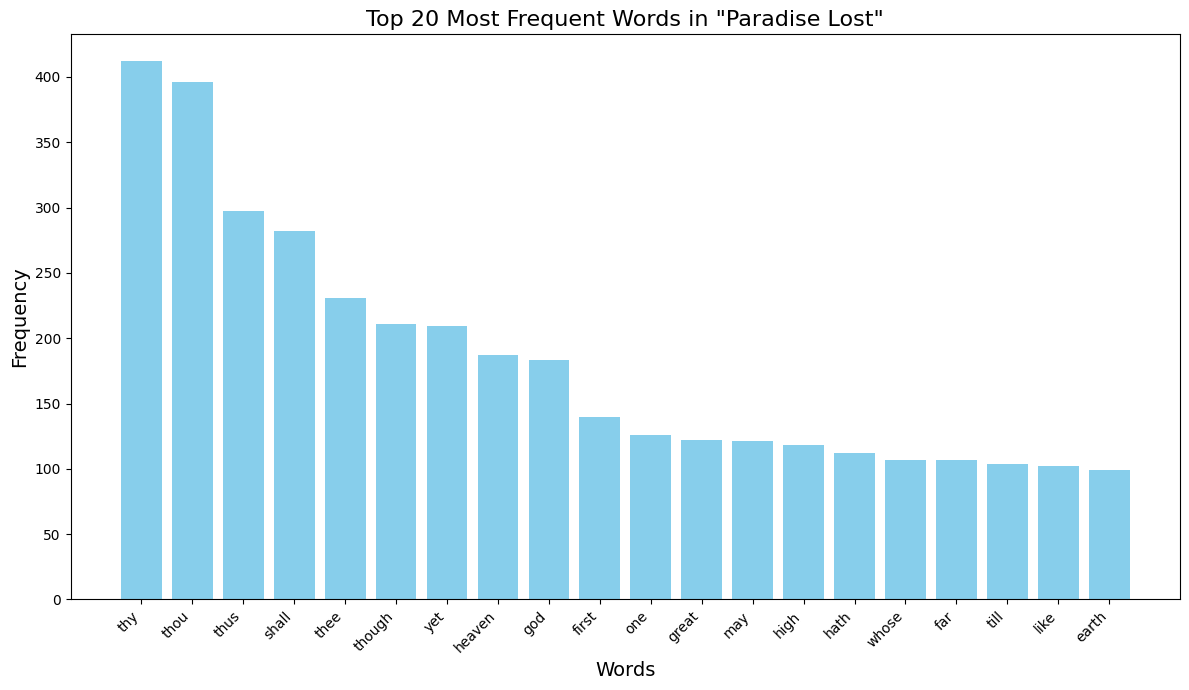

Top 20 Most Frequent Words: [('thy', 412), ('thou', 396), ('thus', 297), ('shall', 282), ('thee', 231), ('though', 211), ('yet', 209), ('heaven', 187), ('god', 183), ('first', 140), ('one', 126), ('great', 122), ('may', 121), ('high', 118), ('hath', 112), ('whose', 107), ('far', 107), ('till', 104), ('like', 102), ('earth', 99)]


In [7]:
def analyze_paradise_lost():

    raw_text = gutenberg.raw('milton-paradise.txt')
    
    lemmatizer = WordNetLemmatizer()
    
    common_stopwords = set(stopwords.words('english'))
    
    tokens = raw_text.split()
    
    cleaned_tokens = []
    
    for token in tokens:
    
        token_lower = token.lower()
    
        if token_lower.isalpha() and token_lower not in common_stopwords and len(token_lower) > 2:
    
            lemma = lemmatizer.lemmatize(token_lower)
    
            cleaned_tokens.append(lemma)

    frequency = Counter(cleaned_tokens)

    most_common_words = frequency.most_common(20)
    
    words, counts = zip(*most_common_words)
    
    plt.figure(figsize=(12, 7))

    plt.bar(words, counts, color='skyblue')

    plt.xlabel('Words', fontsize=14)

    plt.ylabel('Frequency', fontsize=14)

    plt.title('Top 20 Most Frequent Words in "Paradise Lost"', fontsize=16)

    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()

    plt.show()
    
    return most_common_words

top_twenty = analyze_paradise_lost()

print("Top 20 Most Frequent Words:", top_twenty)

**Lemmatization ensures that different forms of a word are linked to their meaningful base form, enhancing the accuracy of the analysis. In contrast, stemming can overly simplify by chopping off word endings without considering the surrounding context.**

# 2. (10 pts) Perform Vader Sentiment Analysis on the book.

* Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.htmlLinks to an external site. . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run.

In [8]:
def extract_sentences(file_id):

    raw_sentences = gutenberg.sents(file_id)

    cleaned_sentences = [" ".join(sentence).strip() for sentence in raw_sentences]

    return cleaned_sentences

def categorize_sentences(sentences, analyzer, pos_threshold=0.5, neg_threshold=-0.5):

    positives = []

    negatives = []

    neutrals = []
    
    for sentence in sentences:

        sentiment_scores = analyzer.polarity_scores(sentence)

        compound_score = sentiment_scores['compound']
        
        if compound_score > pos_threshold:

            positives.append((sentence, compound_score))

        elif compound_score < neg_threshold:

            negatives.append((sentence, compound_score))

        else:

            neutrals.append((sentence, sentiment_scores['neu']))
    
    return positives, negatives, neutrals

def sort_sentences(positives, negatives, neutrals):

    sorted_positives = sorted(positives, key=lambda x: x[1], reverse=True)

    sorted_negatives = sorted(negatives, key=lambda x: x[1])

    sorted_neutrals = sorted(neutrals, key=lambda x: x[1], reverse=True)
    
    return sorted_positives, sorted_negatives, sorted_neutrals

def display_top_sentences(sorted_positives, sorted_negatives, sorted_neutrals, top_n=5):

    print("Top 5 Positive Sentences:")

    for sentence, score in sorted_positives[:top_n]:

        print(f"• {sentence} (Compound Score: {score})")
    
    print("\nTop 5 Negative Sentences:")

    for sentence, score in sorted_negatives[:top_n]:

        print(f"• {sentence} (Compound Score: {score})")
    
    print("\nTop 5 Neutral Sentences:")

    for sentence, score in sorted_neutrals[:top_n]:

        print(f"• {sentence} (Neutral Score: {score})")

def main():

    gutenberg_file = 'milton-paradise.txt'
    
    sentiment_analyzer = SentimentIntensityAnalyzer()
    
    all_sentences = extract_sentences(gutenberg_file)
    
    positive, negative, neutral = categorize_sentences(all_sentences, sentiment_analyzer)
    
    sorted_positive, sorted_negative, sorted_neutral = sort_sentences(positive, negative, neutral)
    
    display_top_sentences(sorted_positive, sorted_negative, sorted_neutral, top_n=5)

if __name__ == "__main__":
    main()

Top 5 Positive Sentences:
• Round he surveys ( and well might , where he stood So high above the circling canopy Of night ' s extended shade ,) from eastern point Of Libra to the fleecy star that bears Andromeda far off Atlantick seas Beyond the horizon ; then from pole to pole He views in breadth , and without longer pause Down right into the world ' s first region throws His flight precipitant , and winds with ease Through the pure marble air his oblique way Amongst innumerable stars , that shone Stars distant , but nigh hand seemed other worlds ; Or other worlds they seemed , or happy isles , Like those Hesperian gardens famed of old , Fortunate fields , and groves , and flowery vales , Thrice happy isles ; but who dwelt happy there He staid not to inquire : Above them all The golden sun , in splendour likest Heaven , Allured his eye ; thither his course he bends Through the calm firmament , ( but up or down , By center , or eccentrick , hard to tell , Or longitude ,) where the grea

# 3. (3 pts) Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

**The archaic language and poetic nature of the book pose challenges for accurate sentiment analysis. Positive passages, such as those depicting Eden, receive high ratings because of words like "happy" and "light." However, this approach misses the overall context. Negative statements, frequently addressing themes of despair or evil, are assigned low scores, yet the subtlety and contemplative tone of the work go unnoticed. Additionally, neutral sentences are often misclassified, as some clearly convey emotions or detailed descriptions but lack the explicit indicators the tool detects. In summary, VADER's dependence on contemporary and direct language reduces its effectiveness in capturing the nuanced and literary qualities of texts like this.**

# Extra credit (3 pts): create a word cloud for your results from question 1 (see chapter 21 in your book for how to do this)

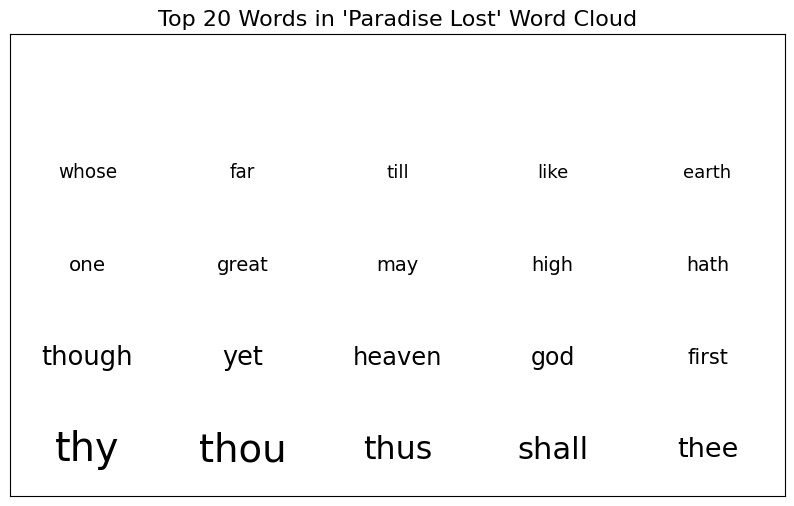

In [9]:
common_terms = [('thy', 412), ('thou', 396), ('thus', 297), ('shall', 282), 
                ('thee', 231), ('though', 211), ('yet', 209), ('heaven', 187), 
                ('god', 183), ('first', 140), ('one', 126), ('great', 122), 
                ('may', 121), ('high', 118), ('hath', 112), ('whose', 107), 
                ('far', 107), ('till', 104), ('like', 102), ('earth', 99)]

def compute_font_size(freq):

    return 8 + (freq / 200) * 10

plt.figure(figsize=(10, 6))

positions = [(x % 5 * 20 + 10, x // 5 * 20 + 10) for x in range(len(common_terms))]

for (term, frequency), (x_pos, y_pos) in zip(common_terms, positions):

    plt.text(

        x_pos,

        y_pos,

        term,

        ha='center',

        va='center',

        fontsize=compute_font_size(frequency)

    )

plt.axis([0, 100, 0, 100])

plt.xticks([])

plt.yticks([])

plt.title("Top 20 Words in 'Paradise Lost' Word Cloud", fontsize=16)

plt.show()